### Logistic Regression with PyTorch
#### 1. About Logistic Regression
##### 1.1 Logistic Regression Basics

<b> Classification algorithm </b>
- Example: Spam vs No Spam
    - Input: Bunch of words
    - Output: Probability spam or not

<b> Basic Comparison </b>
- Linear regression
    - Output: numeric value given inputs
- Logistic Regression
    - Output: probability [0, 1] given input belonging to a class
    
<b> Input/Output Comparison </b>
- <b> Linear regression: Multiplication </b>
    - Input: [1]
        - Output: 2
    - Input : [2]
         - Output: 4
    - Trying to model the realationship $ y = 2x $
- <b> Logistic regression: Spam </b>
    - Input "Sign up to get 1 million dollars by tonight"
        - Output: $ p = 0.8 $
    - Input "This is a recepit for your recent purchase with Amazon"
        - Output: $ p = 0.3 $
    - <b> p:probability it is spam </b>

##### 1.2 Problems of Linear Regression
- Example
    - Fever
    - <b> Input </b>: Temperature
    - <b> Output: fever or not fever </b>
- Remember
    - <b> Linear regression: </b> minimize error between points and line

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]  # C degrees 
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

# big leap ! 
# it can go above 1? below 0? so what there


<Figure size 640x480 with 1 Axes>

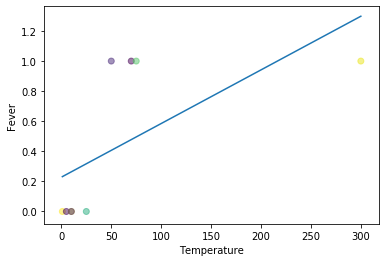

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 300,]  # C degrees 
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

# We have superhot value -> It destroyed our linear regression fit
# Other points are unclear if its is fever or not


##### 1.3 Logistic Regression

<b> Predicting Probability </b>

- Linear regression doesn't work
- Instead of predicting direct values: <b> predict probability </b>

<b> Logistic Function $ g() $ </b>

- Two-class logistic regression
- $ g(y) = Ax + B $
- $ g(y) = 	\frac{1}{1 + e ^{-y}} = \frac{1}{1 + e ^{-(Ax+B)}} $
- $ g(y) = $ Estimated probability that $ y = 1 $ given $ x $

<b> Softmax Function $ g() $ </b>

- Multi-class logistic regression ( for example superspam, notsospam, notreallyspam, maybe nospam )
- Generalization of logistic function


<b> Cross Entropy Function $ D() $ </b>
- $ D(S,L) = L \log{S} - (1 - L) \log{(1-S)}$
    - If $ L = 0 $ (label <- it means that it is not really a spam)
        - $ D(S, 0) = \log{(1 - S)} $
            - $ - \log{(1 - S)} $ :less positive if $ S $ &rarr; $ 0 $ -> We are doing a good job
            - $ - \log{(1 - S)} $ :more positive if $ S $ &rarr; $ 1 $ -> BIG LOSS
    - If $ L = 1 $ (label <- it means that it is really a spam)
        - $ D(S, 1) = \log{(1 - S)} $
            - $ - \log{(1 - S)} $ :less positive if $ S $ &rarr; $ 1 $ -> We are doing a good job
            - $ - \log{(1 - S)} $ :more positive if $ S $ &rarr; $ 0 $ -> BIG LOSS
            
            
<b> Parameters description </b>
- $ S $ : probability ( SOFTMAX ) 
- $ L $ : labels

In [3]:
import math
a = -math.log(1 - 0.00001)
b = -math.log(1 - 0.99999)
print('{0:20f}'.format(a), '-> small distance -> good model')
print('{0:20f}'.format(b), '-> big distance -> bad model -> we need to improve ! ')

c = math.log(0.99999)
d = math.log(0.00001)
print('{0:20f}'.format(c), '-> small distance -> good model')
print('{0:20f}'.format(d), '-> big distance -> bad model -> we need to improve ! ')

            0.000010 -> small distance -> good model
           11.512925 -> big distance -> bad model -> we need to improve ! 
           -0.000010 -> small distance -> good model
          -11.512925 -> big distance -> bad model -> we need to improve ! 


<b> Cross Entropy Loss $ L $ </b>
- Goal: Minimizing Cross Entropy Loss
- $ L = \frac{1}{N} \sum_{i} D(g(Ax_{i} + B), L_{i}) $

#### 2. Building a Logistic Regression Model with PyTorch

- We wil work with MNIST dataset

- <b> Input Layer </b>
    - <b> Input </b> : 
        - Input size: 764
- <b> Readout Layer </b>
    - <b> Logits </b> :
        - Output size: 10 ( 10 numbers - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 )
    - <b> SOFTMAX </b>
    - <b> LABELS </b>
    
- ##### <b> Steps : </b>
    - Step 1 : Load Dataset
    - Step 2 : Make Dataset Iterable (means we can go through the dataset one/multiple example at the time)
    - Step 3 : Create Model Class
    - Step 4 : Instantiate Model Class
    - Step 5 : Instantiate Loss Class
    - Step 6 : Instantiate Optimizer Class
    - Step 7 : Train Model
    

#### Step 1a: Loading MNIST Train Dataset
Images from 0 to 9

In [4]:
import torch # for tensors
import torch.nn as nn # for models
import torchvision.transforms as transforms # transforming dataset
import torchvision.datasets as dsets
from torch.autograd import Variable # variables

In [5]:
# what our model is going to train on
# creates folder called data and save dataset into that folder
# train = True <- means that this is a training dataset
# read the MNIST dataset and transform it into tensor
# download = True <- We want to download <- second time we dont have to download it again
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=False)

In [6]:
len(train_dataset)
# We have 60k different digit images in training dataset

60000

In [7]:
# First training input
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
print('Input Matrix - first image in training set:')
print(train_dataset[0][0].size())

print('Label - Digit that is realy in the image:')
print(train_dataset[0][1])

Input Matrix - first image in training set:
torch.Size([1, 28, 28])
Label - Digit that is realy in the image:
5


#### Displaying MNIST

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

5


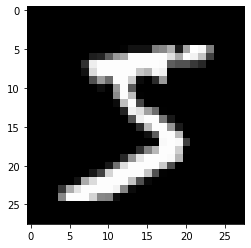

In [10]:
show_img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap='gray')
print(train_dataset[0][1])

0


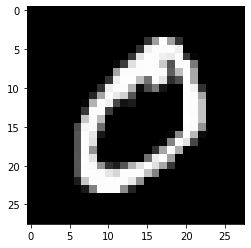

In [11]:
show_img = train_dataset[1][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap='gray')
print(train_dataset[1][1])

#### Steb 1b: Loading MNIST Test Dataset
- Show our algorithm works beyond the data we have trained on.
- Out-of-sample (Overfitting)
- We test our model performance


10000
<class 'torchvision.datasets.mnist.MNIST'>
<class 'tuple'>


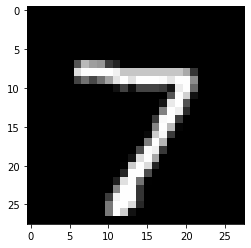

In [12]:
test_dataset = dsets.MNIST(root='.\data',
                          train=False,
                          transform=transforms.ToTensor())
print(len(test_dataset))
print(type(test_dataset))
print(type(test_dataset[0]))      

show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

#### Step 2: Make Dataset Iterable
- Aim: make the dataset iterable = We can iterate through the dataset
- <b> total data </b> : 60 000
- <b> minibatch </b>: 100
    - Number of examples in 1 iteration
    - We pass 100 images
- <b> iterations </b> : 3000
    - 1 Iteration: one minibatch forward & backwardpass <- get gradients and update parameters
    - forward pass = passing images to our model
- <b> epochs </b>
    - 1 epoch: running through the whole dataset once
    - $ epochs = iterations \% \frac{totaldata}{minibatch} = 3000 \% \frac{60000}{100}=5$
    

In [13]:
print(len(train_dataset))
batch_size = 100 # -> 100 images at the time instead of 1 
n_iters = 3000 # -> 
num_epochs = n_iters / (len(train_dataset) / batch_size)
nump_epochs=int(num_epochs)
print(num_epochs)

60000
5.0


<b> Create Iterable Object: Training Dataset </b>

In [14]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
# We go through images in different sequences in epochs

<b> Check Iterability </b>

In [15]:
import collections
isinstance(train_loader, collections.Iterable)
# True when iterable , False non iterable

True

<b> Create Iterable Object: Testing Dataset </b>

In [16]:
# Iterable object
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

<b> Check Iterability </b>

In [17]:
import collections
isinstance(test_loader, collections.Iterable)
# True when iterable , False non iterable

True

<b> Main Aim: Iterate Through Dataset </b>

In [18]:
img_1 = np.ones((28,28))
img_2 = np.ones((28,28))
lst = [img_1, img_2]

In [19]:
# Need to iterate
# Think of numbers as the images
for i in lst:
    print(i.shape)

(28, 28)
(28, 28)


#### Step 3: Building Model

In [20]:
# Same as linear regression1
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        out = self.linear(x)
        return out
    # Every call of forward f <- passing x and get y <- then softmax ...

#### Step 4: Instantiate Model Class
- Input dimension:
    - Size of image
    - 28 x 28 = 784
- Output dimension: 10
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9


In [21]:
# Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [22]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#### Step 5: Instantiate Loss Class
- Logistic Regression : Cross Entropy Loss
    - Linear Regression: MSE

In [23]:
criterion = nn.CrossEntropyLoss() # probabilty instead , no squared error

<b> What happens in nn.CrossEntropyLoss()? </b>
- Computes softmax(logistic/softmax function)
- Computes cross entropy

#### Step 6: Instantiate Optimizer Class
- Simplified equation
    - $ \theta = \theta - \eta * \nabla_{\theta} $
        - $ \theta $ : parameters (our variables, we want to continually update them - $ \alpha $ and $ \beta $)
        - $ \eta $ : learning rate (how fast we want to learn)
        - $ \nabla_{\theta} $ : parameters' gradients
- Even simplier equation
    - <b> parameters = parameters - learning_rate * parameters_gradients </b>
    - <b> At every iteration, we update our model's parameters </b>

In [24]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Paramters In-Depth

In [25]:
print(model.parameters())

print(len(list(model.parameters()))) # list for accesing

# 2 paramters list -> 10,784 -> A linear parameters
# 2nd elemenet is bias

# PC 1 Parameters
print(list(model.parameters())[0].size())

# PC 1 Bias Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x000001EB592A83C8>
2
torch.Size([10, 784])
torch.Size([10])


#### Step 7: Train Model
- Process
    - 1.Convert inputs/labels to variables
    - 2.Clear gradients buffets
    - 3.Get output given inputs 
    - 4.Get loss
    - 5.Get gradients w.r.t. paramters
    - 6.Upadate using gradients
        - $ parameters = parameters - learning_rate * paramaters_gradients $
    - 7.REPEAT

In [27]:
iter = 0
num_epochs=int(num_epochs)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader): # 60k
        # Load images as Variable
        images = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss=criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters 
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0 
            total = 0
            #Iterate through test dataset
            for images, labels in test_loader:
                # Iterate images to a Torch Variable
                images = Variable(images.view(-1, 28*28))
                
                # Forward pass only to get logits / outputs
                outputs = model(images)
                
                # Get predictions from the maximumum value
                _, predicted = torch.max(outputs.data, 1)
                
                #Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
#             loss=float(loss)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(),accuracy))

Iteration: 500. Loss: 0.9881810545921326. Accuracy: 83
Iteration: 1000. Loss: 0.8654266595840454. Accuracy: 83
Iteration: 1500. Loss: 0.9520781636238098. Accuracy: 84
Iteration: 2000. Loss: 0.7178725600242615. Accuracy: 84
Iteration: 2500. Loss: 0.7964059710502625. Accuracy: 85
Iteration: 3000. Loss: 0.8221322894096375. Accuracy: 85
